In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [283]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/VEDL.csv")

In [284]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,SESAGOA,EQ,107.70,111.00,116.35,108.00,116.35,116.35,114.80,20371,2.338597e+11,NaN,NaN,NaN
1,2000-01-04,SESAGOA,EQ,116.35,113.75,116.00,108.00,116.00,114.70,113.34,22366,2.534994e+11,NaN,NaN,NaN
2,2000-01-05,SESAGOA,EQ,114.70,107.55,115.85,107.55,114.50,114.00,112.78,18305,2.064361e+11,NaN,NaN,NaN
3,2000-01-06,SESAGOA,EQ,114.00,112.00,123.10,112.00,118.80,119.30,119.89,25800,3.093133e+11,NaN,NaN,NaN
4,2000-01-07,SESAGOA,EQ,119.30,119.85,120.00,114.05,116.50,116.50,116.84,17361,2.028403e+11,NaN,NaN,NaN


In [285]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5305 non-null   object 
 1   Symbol              5305 non-null   object 
 2   Series              5305 non-null   object 
 3   Prev Close          5305 non-null   float64
 4   Open                5305 non-null   float64
 5   High                5305 non-null   float64
 6   Low                 5305 non-null   float64
 7   Last                5305 non-null   float64
 8   Close               5305 non-null   float64
 9   VWAP                5305 non-null   float64
 10  Volume              5305 non-null   int64  
 11  Turnover            5305 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.8

In [286]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5.305000e+03,5.305000e+03,2456.000000,4.792000e+03,4792.000000
mean,462.461188,463.406183,474.350236,451.723685,462.468407,462.489378,463.558641,5.980439e+06,1.182407e+14,64592.116450,2.096782e+06,0.348614
std,719.934594,721.532016,740.938801,700.907608,719.828804,719.923628,722.096572,1.020356e+07,1.571569e+14,42619.409534,3.516599e+06,0.148474
min,38.100000,38.100000,39.950000,37.100000,38.100000,38.100000,38.660000,5.100000e+01,2.465900e+08,1064.000000,1.630000e+03,0.071300
25%,119.550000,119.000000,123.400000,115.100000,119.500000,119.600000,119.000000,1.853450e+05,1.429950e+13,36094.750000,1.119035e+05,0.238675
50%,202.350000,202.350000,206.000000,198.600000,202.000000,202.350000,202.810000,2.441535e+06,6.760174e+13,56361.500000,9.867705e+05,0.322850
75%,359.150000,360.000000,368.700000,351.000000,358.050000,359.150000,359.720000,8.630236e+06,1.745150e+14,83665.000000,2.843874e+06,0.429425
max,4344.200000,4400.000000,4400.000000,4310.000000,4355.000000,4344.200000,4346.450000,2.709680e+08,4.374148e+15,616591.000000,9.555991e+07,0.983900


In [287]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [288]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [289]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [290]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [291]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [292]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [293]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5300,4.398955,3.070557,236.65,16763872,NaN
5301,2.279381,1.501564,243.35,15648609,NaN
5302,3.510238,0.308452,243.90,13518520,NaN
5303,5.773196,3.784334,255.05,25110119,NaN
5304,5.404870,0.862576,257.25,21911292,NaN


In [294]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [295]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [296]:
#Define the prediction model
model = RandomForestRegressor()

In [297]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [298]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9027018803550262


In [299]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [300]:
predictions = model.predict(X_Check)

In [301]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

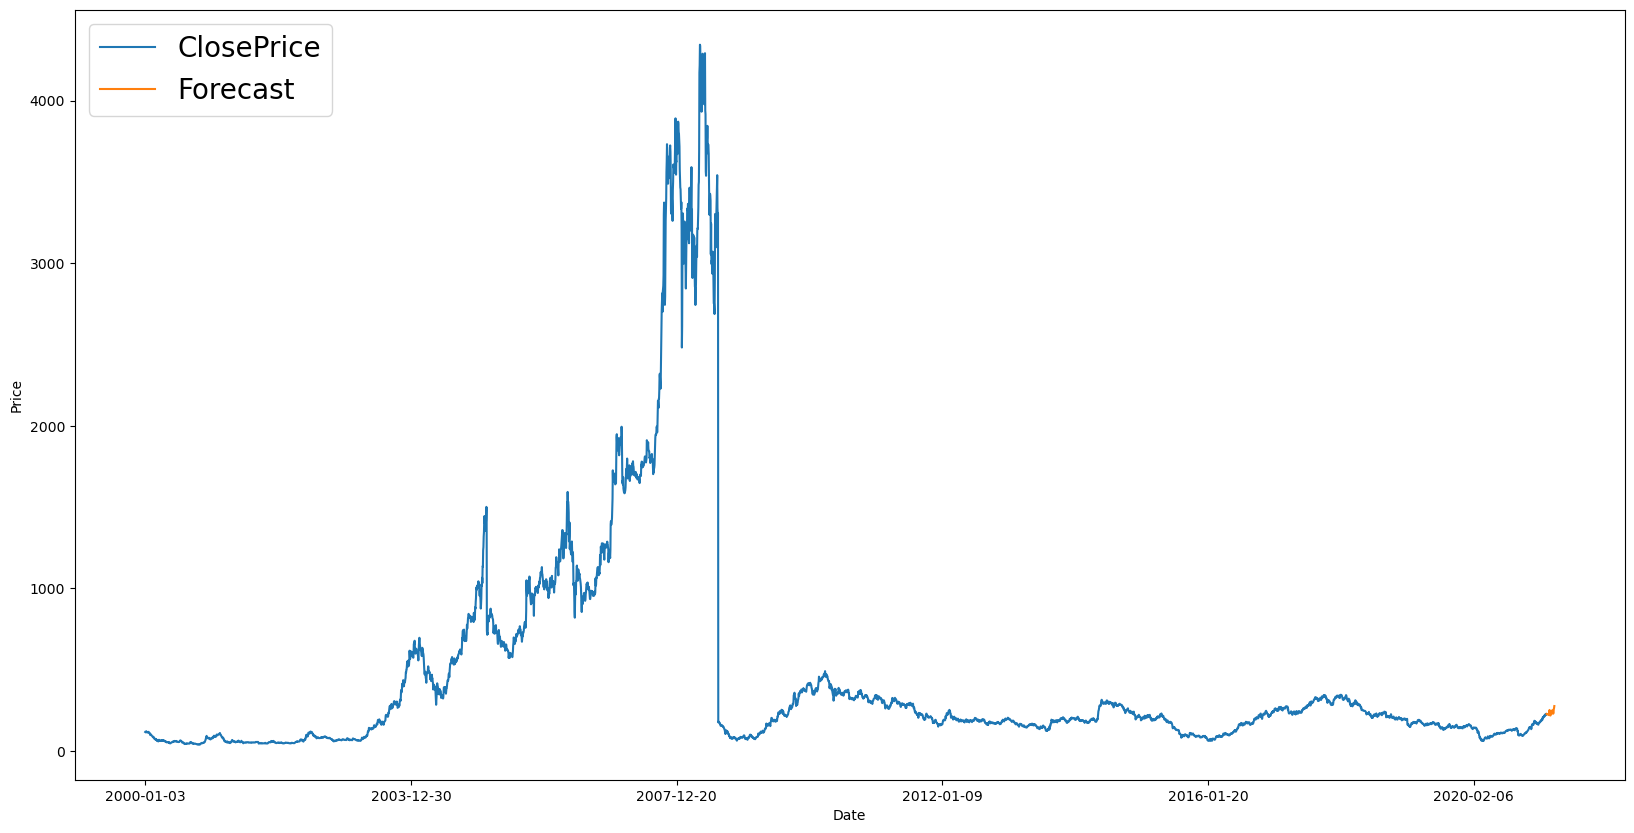

In [302]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')